In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from google.colab import drive
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
drive.mount('/content/drive')
mpl.style.use('bmh')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Lectura de archivos**

In [ ]:
# **Read File Credit_Record**
pd_credit_record_initial = pd.read_csv("/content/drive/MyDrive/Desafios- Curso Data Science -Comisión 29825/Desafio 2 Visualizaciones con Python/Tarjeta Credito/credit_record.csv")
pd_credit_record_initial.head()


ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [ ]:
# Read File Application
pd_application_record = pd.read_csv("/content/drive/MyDrive/Desafios- Curso Data Science -Comisión 29825/Desafio 2 Visualizaciones con Python/Tarjeta Credito/application_record.csv")
pd_application_record.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

# **Exploracion datasets**

## Credit card record


In [ ]:
pd_credit_record_initial.shape


(1048575, 3)

In [ ]:
pd_credit_record_initial.describe()

ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00

In [ ]:
pd_credit_record_initial.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [ ]:
pd_credit_record_initial.isnull().sum()


ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(pd_credit_record_initial, minimal=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Application record


In [ ]:
pd_application_record.shape


(438557, 18)

In [ ]:
pd_application_record.describe()

ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000         1.0         0.000000       0.000000   
50%     -1467.000000         1.0         0.000000       0.000000   
75%      -371.000000         1.0         0.000000       1.000000   
max    365243.000000         1.0         1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  
count  438557.000000    438557.000000  
mean        0.108207         2.194465  
std         0.310642         0.897207  
min         0.000000         1.000000  
25%         0.000000         2.000000  
50%         0.000000         2.000000  
75%         0.000000         3.000000  
max         1.000000        20.000000

In [ ]:
pd_application_record.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [ ]:
pd_application_record.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(pd_application_record, minimal=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**Limpieza de datos**


In [ ]:
pd_credit_record = pd_credit_record_initial.drop_duplicates(subset=['ID'])
pd_application_record = pd_application_record.drop_duplicates(subset=['ID'])
print(pd_credit_record.shape)
print(pd_application_record.shape)


(45985, 3)
(438510, 18)


## Credit card record

### Cuales son los clientes que estuvieron en mora mayores o iguales a 60 días en los ultimos 5 años?

In [ ]:
print("Numero de clientes en el record de trajetas de credito: {}".format(
    len(pd_credit_record_initial.ID.unique())))
# para verificar si tenemos alguna data perdida
pd_credit_record_charge_off_rate = pd_credit_record_initial.copy()
pd_credit_record_drop = pd_credit_record_charge_off_rate.dropna()
if pd_credit_record_charge_off_rate.shape == pd_credit_record_drop.shape:
    print("No hay data perdida.")
else:
    print("Tenemos {} filas  con data perdida".format(len(
        pd_credit_record_charge_off_rate.ID.unique())-len(pd_credit_record_drop.ID.unique())))

Numero de clientes en el record de trajetas de credito: 45985
No hay data perdida.


In [ ]:
# Agrupnado por ID`s
pd_credit_record_charge_off_rate.sort_values('ID')

# Verificando duplicados
groups_month = pd_credit_record_charge_off_rate.groupby(
    ['ID', 'MONTHS_BALANCE'])
groups_month_count = groups_month.count()
groups_month_count = groups_month_count.rename(columns={"STATUS": "COUNT"})
if groups_month_count.loc[groups_month_count['COUNT'] > 1].empty:
    print("No hay duplicados")
else:
    print("Hay duplicados")


No hay duplicados


In [ ]:
# reshape data by 'ID' based on 'MONTHS_BALANCE'
credit_pivot = pd_credit_record_charge_off_rate.pivot(
    index='ID', columns='MONTHS_BALANCE', values='STATUS')
print(credit_pivot.head())

MONTHS_BALANCE  -60  -59  -58  -57  -56  -55  -54  -53  -52  -51  ...  -9   \
ID                                                                ...        
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    0   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    X   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    X   
5001715         NaN    X    X    X    X    X    X    X    X    X  ...    X   

MONTHS_BALANCE  -8   -7   -6   -5   -4  -3  -2  -1   0   
ID                                                       
5001711         NaN  NaN  NaN  NaN  NaN   0   0   0   X  
5001712           C    C    C    C    C   C   C   C   C  
5001713           X    X    X    X    X   X   X   X   X  
5001714           X    X    X    X    X   X   X   X   X  
5001715           X    X    X    X    X   X   X   X   X  

[5 rows x 61 columns]


In [ ]:
# Asumimos que el ultimo mes esta abierto para realizar pago
# Asumimos que el primer mes esta cerrado para realizar pago
# group pd_credit_record_charge_off_rate  por 'ID' e identificamos el ultimo y el primer mes.
credit_grouped = pd_credit_record_charge_off_rate.groupby('ID')
credit_pivot['open_month'] = credit_grouped['MONTHS_BALANCE'].min()
credit_pivot['close_month'] = credit_grouped['MONTHS_BALANCE'].max()
credit_pivot['ID'] = credit_pivot.index
credit_pivot = credit_pivot[['ID', 'open_month', 'close_month']]
credit_pivot.reset_index(drop=True, inplace=True)
credit_pivot["window_month"] = credit_pivot['close_month'] - \
    credit_pivot['open_month']
# merge ambos df
credit = pd.merge(pd_credit_record_charge_off_rate,
                  credit_pivot, how='left', on='ID')
# Meses en el balance
credit['MOB'] = credit['MONTHS_BALANCE']-credit['open_month']
credit.sort_values(['ID', 'MOB'], inplace=True)

# Divido por 48 para llevarlo a 4 years
bins = [k for k in range(-61, 1, 12)]
credit['open_year'] = pd.cut(
    credit['open_month'], bins, labels=[-5, -4, -3, -2, -1])  # open_year_to_today

credit0 = credit
credit0.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID  MONTHS_BALANCE STATUS  open_month  close_month  window_month  \
3   5001711              -3      0          -3            0             3   
2   5001711              -2      0          -3            0             3   
1   5001711              -1      0          -3            0             3   
0   5001711               0      X          -3            0             3   
22  5001712             -18      0         -18            0            18   

    MOB open_year  
3     0        -1  
2     1        -1  
1     2        -1  
0     3        -1  
22    0        -2

In [ ]:

# un cliente sera considerado como "malo" 'bad' (1) si ha tenido mora mayores o iguales 60 dias en los ultimos cinco años
credit['overdue'] = np.where( (credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3') | (credit['STATUS'] == '4') | (credit['STATUS'] == '5' ), 1, 0)

df_mask= credit['overdue']== 1

Bad_cliente_df =credit[df_mask ]
Bad_cliente_df.drop_duplicates(subset=['ID'])


ID  MONTHS_BALANCE STATUS  open_month  close_month  \
154      5001718             -12      1         -38            0   
239      5001720             -15      1         -35            0   
918      5001757              -3      1         -20            0   
1490     5001786             -38      1         -58            0   
1630     5001792              -8      1         -24            0   
...          ...             ...    ...         ...          ...   
1047846  5150412              -9      1         -17            0   
1047963  5150417             -30      1         -37          -11   
1048173  5150459             -43      1         -51            0   
1048223  5150463              -2      1         -10            0   
1048245  5150464             -13      1         -21            0   

         window_month  MOB open_year  overdue  
154                38   26        -4        1  
239                35   20        -3        1  
918                20   17        -2        1  
1490               58   20        -5        1  
1630               24   16        -2        1  
...               ...  ...       ...      ...  
1047846            17    8        -2        1  
1047963            26    7        -4        1  
1048173            51    8        -5        1  
1048223            10    8        -1        1  
1048245            21    8        -2        1  

[5350 rows x 9 columns]

In [ ]:
N = len(pd_credit_record)

for i in range(N):
  if  pd_credit_record.iloc[i,0] in Bad_cliente_df.ID.values:
      pd_credit_record.iloc[i,2] = 1
  else:
      pd_credit_record.iloc[i,2] = 0
      



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pd_credit_record.head()

ID  MONTHS_BALANCE STATUS
0   5001711               0      0
4   5001712               0      0
23  5001713               0      0
45  5001714               0      0
60  5001715               0      0

In [ ]:
merge_record = pd.merge(pd_credit_record, pd_application_record, on=["ID"])
merge_record.sort_values("ID", inplace=True)
merge_record['DAYS_BIRTH'] = merge_record['DAYS_BIRTH']/-365
merge_record.rename(columns={'DAYS_BIRTH':"AGE"}, inplace=True)

merge_record['DAYS_EMPLOYED'] = merge_record['DAYS_EMPLOYED']/-365
merge_record.rename(columns={'DAYS_EMPLOYED':"YEARS_EMPLOYED"}, inplace=True)

merge_record.head()

ID  MONTHS_BALANCE STATUS CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  5008804               0      1           M            Y               Y   
1  5008805               0      1           M            Y               Y   
2  5008806               0      0           M            Y               Y   
3  5008808               0      0           F            N               Y   
4  5008809             -22      0           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0             0          427500.0               Working   
1             0          427500.0               Working   
2             0          112500.0               Working   
3             0          270000.0  Commercial associate   
4             0          270000.0  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education        Civil marriage   Rented apartment   
1               Higher education        Civil marriage   Rented apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

         AGE  YEARS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
0  32.890411       12.443836           1                1           0   
1  32.890411       12.443836           1                1           0   
2  58.832877        3.106849           1                0           0   
3  52.356164        8.358904           1                0           1   
4  52.356164        8.358904           1                0           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0           0             NaN              2.0  
1           0             NaN              2.0  
2           0  Security staff              2.0  
3           1     Sales staff              1.0  
4           1     Sales staff              1.0

In [ ]:
merge_record.shape

(36457, 20)

In [ ]:
merge_record.describe()

ID  MONTHS_BALANCE  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  3.645700e+04    36457.000000  36457.000000      3.645700e+04   
mean   5.078227e+06       -5.831802      0.430315      1.866857e+05   
std    4.187524e+04       11.326494      0.742367      1.017892e+05   
min    5.008804e+06      -60.000000      0.000000      2.700000e+04   
25%    5.042028e+06       -6.000000      0.000000      1.215000e+05   
50%    5.074614e+06        0.000000      0.000000      1.575000e+05   
75%    5.115396e+06        0.000000      1.000000      2.250000e+05   
max    5.150487e+06        0.000000     19.000000      1.575000e+06   

                AGE  YEARS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
count  36457.000000    36457.000000     36457.0     36457.000000   
mean      43.767598     -162.364207         1.0         0.225526   
std       11.508356      377.126945         0.0         0.417934   
min       20.517808    -1000.665753         1.0         0.000000   
25%       34.142466        1.117808         1.0         0.000000   
50%       42.638356        4.252055         1.0         0.000000   
75%       53.254795        8.638356         1.0         0.000000   
max       68.909589       43.049315         1.0         1.000000   

         FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  
count  36457.000000  36457.000000     36457.000000  
mean       0.294813      0.089722         2.198453  
std        0.455965      0.285787         0.911686  
min        0.000000      0.000000         1.000000  
25%        0.000000      0.000000         2.000000  
50%        0.000000      0.000000         2.000000  
75%        1.000000      0.000000         3.000000  
max        1.000000      1.000000        20.000000

# **Reducción de la dimensionalidad del dataset**

## Identificando Outliers

In [ ]:
l=[x for x in merge_record.columns if x not in ["ID", "MONTHS_BALANCE",	"STATUS", "CODE_GENDER", "FLAG_OWN_CAR","FLAG_OWN_REALTY","DAYS_EMPLOYED", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",	"NAME_FAMILY_STATUS",	"NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"]]
agg_merge_record= merge_record[l]
agg_merge_record

CNT_CHILDREN  AMT_INCOME_TOTAL        AGE  YEARS_EMPLOYED
0                 0          427500.0  32.890411       12.443836
1                 0          427500.0  32.890411       12.443836
2                 0          112500.0  58.832877        3.106849
3                 0          270000.0  52.356164        8.358904
4                 0          270000.0  52.356164        8.358904
...             ...               ...        ...             ...
36452             1          157500.0  29.610959        4.764384
36453             1          157500.0  29.610959        4.764384
36454             1          157500.0  29.610959        4.764384
36455             1          157500.0  29.610959        4.764384
36456             0          202500.0  53.145205        5.934247

[36457 rows x 4 columns]

In [ ]:
for i,j in zip(range(3),agg_merge_record.columns):
  fig=px.box(agg_merge_record.columns, x=agg_merge_record[j], title = str(agg_merge_record[j].name), height=400)
  fig.show()


In [ ]:
def outliers(df,ft):
  Q1=df[ft].quantile(0.25)
  Q3=df[ft].quantile(0.75)
  IQR = Q3 - Q1

  frontera_inferior=Q1 -1.5*IQR
  frontera_superior=Q3 +1.5*IQR

  ls = df.index[(df[ft] < frontera_inferior) | (df[ft] > frontera_superior )]

  return ls


In [ ]:
index_list=[]
for column in ["AMT_INCOME_TOTAL","AGE","CNT_CHILDREN","YEARS_EMPLOYED"]:
  index_list.extend(outliers(agg_merge_record,column))

print("Se identiticaron ",len(index_list),"Outliers")

Se identiticaron  9942 Outliers


## Removiendo Outliers

In [ ]:
def remover_outliers (df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
merge_cleaned = remover_outliers (merge_record,index_list)
merge_cleaned

ID  MONTHS_BALANCE STATUS CODE_GENDER FLAG_OWN_CAR  \
2      5008806               0      0           M            Y   
3      5008808               0      0           F            N   
4      5008809             -22      0           F            N   
5      5008810               0      0           F            N   
6      5008811               0      0           F            N   
...        ...             ...    ...         ...          ...   
36452  5150482             -11      0           F            Y   
36453  5150483               0      0           F            Y   
36454  5150484               0      0           F            Y   
36455  5150485               0      0           F            Y   
36456  5150487               0      0           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
2                   Y             0          112500.0               Working   
3                   Y             0          270000.0  Commercial associate   
4                   Y             0          270000.0  Commercial associate   
5                   Y             0          270000.0  Commercial associate   
6                   Y             0          270000.0  Commercial associate   
...               ...           ...               ...                   ...   
36452               Y             1          157500.0               Working   
36453               Y             1          157500.0               Working   
36454               Y             1          157500.0               Working   
36455               Y             1          157500.0               Working   
36456               N             0          202500.0               Working   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
2      Secondary / secondary special               Married  House / apartment   
3      Secondary / secondary special  Single / not married  House / apartment   
4      Secondary / secondary special  Single / not married  House / apartment   
5      Secondary / secondary special  Single / not married  House / apartment   
6      Secondary / secondary special  Single / not married  House / apartment   
...                              ...                   ...                ...   
36452  Secondary / secondary special               Married  House / apartment   
36453  Secondary / secondary special               Married  House / apartment   
36454  Secondary / secondary special               Married  House / apartment   
36455  Secondary / secondary special               Married  House / apartment   
36456  Secondary / secondary special               Married  House / apartment   

             AGE  YEARS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
2      58.832877        3.106849           1                0           0   
3      52.356164        8.358904           1                0           1   
4      52.356164        8.358904           1                0           1   
5      52.356164        8.358904           1                0           1   
6      52.356164        8.358904           1                0           1   
...          ...             ...         ...              ...         ...   
36452  29.610959        4.764384           1                0           0   
36453  29.610959        4.764384           1                0           0   
36454  29.610959        4.764384           1                0           0   
36455  29.610959        4.764384           1                0           0   
36456  53.145205        5.934247           1                0           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  
2               0  Security staff              2.0  
3               1     Sales staff              1.0  
4               1     Sales staff              1.0  
5               1     Sales staff              1.0  
6               1     Sales staff              1.0  
...           ...             ...              ...  
3

In [ ]:
l=[x for x in merge_cleaned.columns if x not in ["ID", "MONTHS_BALANCE",	"STATUS", "CODE_GENDER", "FLAG_OWN_CAR","FLAG_OWN_REALTY","DAYS_EMPLOYED", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",	"NAME_FAMILY_STATUS",	"NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"]]
agg_merge_record_test= merge_cleaned[l]
agg_merge_record_test

CNT_CHILDREN  AMT_INCOME_TOTAL        AGE  YEARS_EMPLOYED
2                 0          112500.0  58.832877        3.106849
3                 0          270000.0  52.356164        8.358904
4                 0          270000.0  52.356164        8.358904
5                 0          270000.0  52.356164        8.358904
6                 0          270000.0  52.356164        8.358904
...             ...               ...        ...             ...
36452             1          157500.0  29.610959        4.764384
36453             1          157500.0  29.610959        4.764384
36454             1          157500.0  29.610959        4.764384
36455             1          157500.0  29.610959        4.764384
36456             0          202500.0  53.145205        5.934247

[26703 rows x 4 columns]

In [ ]:
#plt.figure(figsize=(13,11))
for i,j in zip(range(3),agg_merge_record_test):
  fig=px.box(agg_merge_record_test, x=agg_merge_record_test[j], title = str(agg_merge_record_test[j].name), height=400)
  fig.show()
  #plt.subplot(4,2,i+1)
  #sns.boxplot(x=agg_merge_record_test[j])
  #plt.title(j)
  #plt.xlabel('')

Debido a la poca variabilidad de los datos en la cantidad de hijos (mayormente 0 o 1), se genera una division importante en el arbol de decisiones ya que son 2 extremos que hacen una gran diferencia en la economia de un cliente.

In [ ]:
merge_cleaned.drop(
    ["MONTHS_BALANCE"], axis=1, inplace=True)
merge_cleaned['STATUS'] = merge_cleaned['STATUS'].astype('int64')
merge_cleaned.head()

ID  STATUS CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
2  5008806       0           M            Y               Y             0   
3  5008808       0           F            N               Y             0   
4  5008809       0           F            N               Y             0   
5  5008810       0           F            N               Y             0   
6  5008811       0           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   
5          270000.0  Commercial associate  Secondary / secondary special   
6          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE        AGE  YEARS_EMPLOYED  \
2               Married  House / apartment  58.832877        3.106849   
3  Single / not married  House / apartment  52.356164        8.358904   
4  Single / not married  House / apartment  52.356164        8.358904   
5  Single / not married  House / apartment  52.356164        8.358904   
6  Single / not married  House / apartment  52.356164        8.358904   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   
5           1                0           1           1     Sales staff   
6           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
2              2.0  
3              1.0  
4              1.0  
5              1.0  
6              1.0

In [ ]:
merge_cleaned.dtypes

ID                       int64
STATUS                   int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
AGE                    float64
YEARS_EMPLOYED         float64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

## Verificar tamaño

In [ ]:
merge_cleaned["STATUS"].value_counts()

0    23505
1     3198
Name: STATUS, dtype: int64

En base a esta información es posible verificar que existe una diferencia de 7.5 entre la cantidad de muestra entre el estatus 0 y el 1.
Esto es necesario considerar porque se generará un peso de esta diferencia para la clase 1 en el arbol de decision.

# **Obtención de insights**

##Análisis Univariado

In [ ]:
Num_variables = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AGE",	"YEARS_EMPLOYED", "CNT_FAM_MEMBERS"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

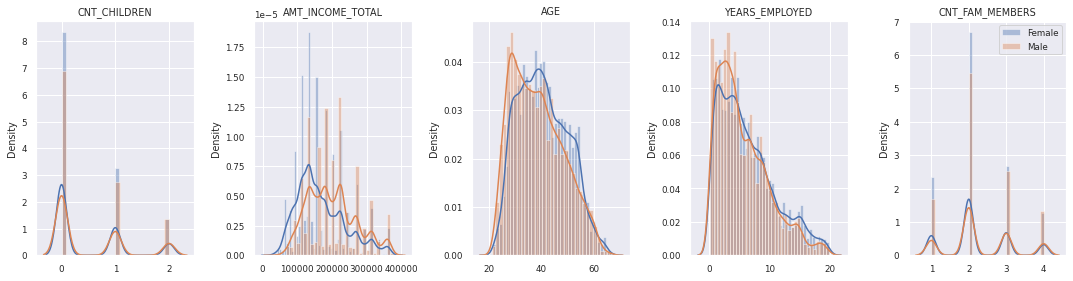

In [ ]:
columns = 5
fig, axes = plt.subplots(len(Num_variables) //columns, columns,squeeze=False, figsize=(15,4))

F = merge_cleaned[merge_cleaned['CODE_GENDER']=="F"]
M = merge_cleaned[merge_cleaned['CODE_GENDER']=="M"]

for current_idx, variable in enumerate(Num_variables):
    i = current_idx // columns # Filas
    j = current_idx % columns  # Columnas

    sns.distplot(F[variable],label= 'Female', ax=axes[i][j])
    sns.distplot(M[variable],label= 'Male', ax=axes[i][j])

    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()
plt.legend()
plt.show()

### Tiene impacto en la aprobación de TDC el nivel academico de los solicitantes?

In [ ]:
record_approved = merge_cleaned["STATUS"] == 0
merge_record_approved =merge_cleaned[record_approved]
merge_record_approved

In [ ]:
# Dataframe record_EDUCATION_TOTAL
pd_application_record_EDUCATION = merge_cleaned.groupby(
    ["NAME_EDUCATION_TYPE"]).size().reset_index(name="COUNT")
pd_application_record_EDUCATION_percentage = pd_application_record_EDUCATION.assign(
    PERCETANGE=pd_application_record_EDUCATION[["COUNT"]] / len(merge_record)*100)
pd_application_record_EDUCATION_percentage

NAME_EDUCATION_TYPE  COUNT  PERCETANGE
0                Academic degree     28    0.076803
1               Higher education   7548   20.703843
2              Incomplete higher   1220    3.346408
3                Lower secondary    209    0.573278
4  Secondary / secondary special  17698   48.544861

In [ ]:
# Dataframe record_EDUCATION_APPROVED
pd_application_record_EDUCATION_APPROVED = merge_record_approved.groupby(
    ["NAME_EDUCATION_TYPE"]).size().reset_index(name="COUNT")
pd_application_record_EDUCATION_APPROVED_percentage = pd_application_record_EDUCATION_APPROVED.assign(
    PERCETANGE=pd_application_record_EDUCATION_APPROVED[["COUNT"]] / len(merge_record_approved)*100)
pd_application_record_EDUCATION_APPROVED_percentage

NAME_EDUCATION_TYPE  COUNT  PERCETANGE
0                Academic degree     22    0.093597
1               Higher education   6689   28.457775
2              Incomplete higher   1045    4.445863
3                Lower secondary    180    0.765795
4  Secondary / secondary special  15569   66.236971

In [ ]:
# Subplot comparando Solicitados vs aprobados
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

labels = list(pd_application_record_EDUCATION_percentage["NAME_EDUCATION_TYPE"])

fig.add_trace(go.Pie(labels=labels, values=list(pd_application_record_EDUCATION_percentage["COUNT"]) , pull=[0.2, 0.2, 0.2, 0.2]), 1, 1)

fig.add_trace(go.Pie(labels=labels, values=list(pd_application_record_EDUCATION_APPROVED_percentage["COUNT"]) ,  pull=[0.2, 0.2, 0.2, 0.2]),
              1, 2)

# Creando grafico tipo dona
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Nivel academico",
# Sumando anotaciones
    annotations=[dict(text='Solicitantes', x=0.17, y=0.5, font_size=15, showarrow=False),
                 dict(text='Aprobados', x=0.83, y=0.5, font_size=15, showarrow=False)])


fig.show()

**Interpretación de los resultados**

Con respecto al total de los solicitantes y de quienes recibieron una tarjeta de credito, se observa que mas de la mitad cuentan con la secundaria completa y mas de un cuarto cuenta con educaciòn superior culminada. Con lo cual mas del 95% cuentan nivel educativo alto o medio y no se observa incidencia del nivel educativo en el otorgamiento de dicha tarjeta. Dado que se mantiene las proporciones en ambas poblaciones. Con lo cual se demuestra que esta variable no impacta la aprobación de la TDC.

##Análisis Bivariado

<Figure size 432x288 with 0 Axes>

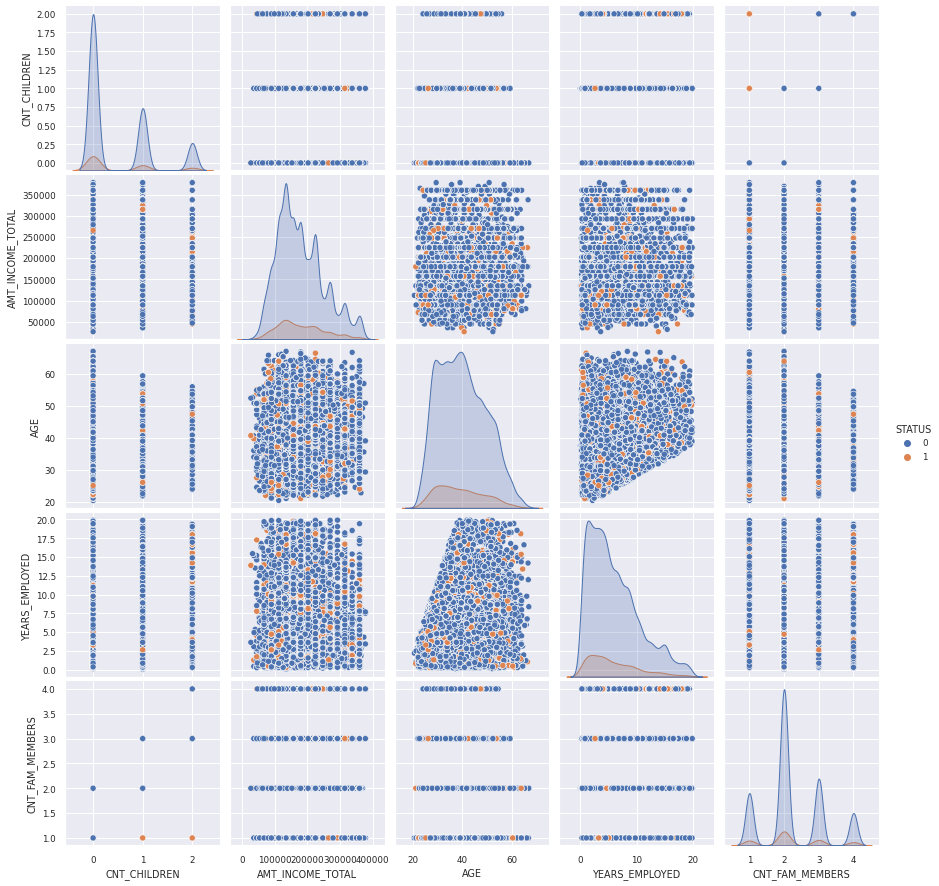

In [ ]:
plt.figure()
Num_Gen_var = Num_variables.copy()
Num_Gen_var.append('STATUS')

sns.pairplot(merge_cleaned[Num_Gen_var]  ,hue = 'STATUS', hue_order =[0, 1])#,palette = 'plasma')

plt.show()

###¿Cual es la correlacion entre el estado civil de los clientes y la tasa de aprovacion de tarjetas de credito?

In [ ]:
status_Family_Status_Join = pd.concat([merge_cleaned["NAME_FAMILY_STATUS"], merge_record["STATUS"]],
                                      axis=1)
countRows = status_Family_Status_Join.shape[0]
status_Family_Status_Join.index = np.arange(countRows)

mapped = status_Family_Status_Join.groupby(
    ["NAME_FAMILY_STATUS", "STATUS"]).size().reset_index(name="COUNT")
mapped.head()

NAME_FAMILY_STATUS  STATUS  COUNT
0     Civil marriage       0   2080
1     Civil marriage       1    295
2            Married       0  16290
3            Married       1   2200
4          Separated       0   1341

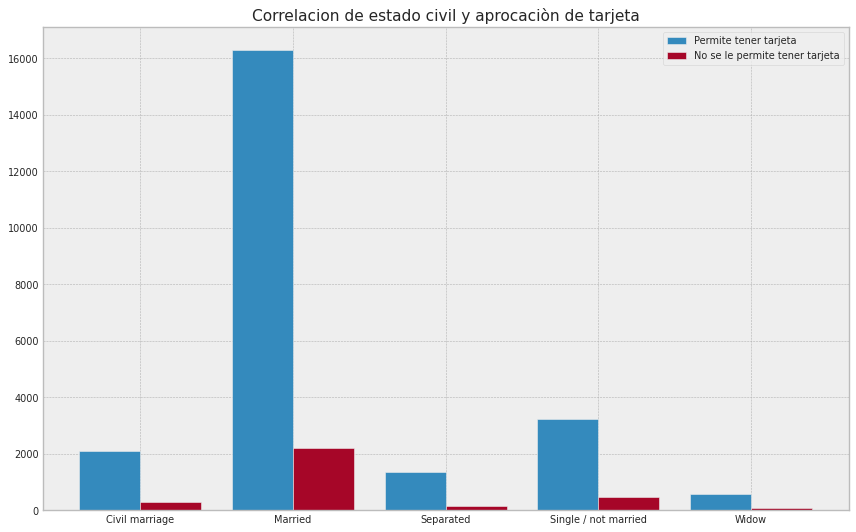

In [ ]:
mappped_Pivoted = mapped.pivot(
    index="STATUS", columns="NAME_FAMILY_STATUS", values="COUNT")

status0 = []
status1 = []
columnsValues = mappped_Pivoted.columns.values
figure(figsize=(13, 8), dpi=80)

for valueSts in columnsValues:
    status0.append(mappped_Pivoted[valueSts][0])
    status1.append(mappped_Pivoted[valueSts][1])

x_axis = np.arange(len(columnsValues))

# Multi bar Chart

plt.bar(x_axis - 0.2, status0, width=0.4, label='Permite tener tarjeta')
plt.bar(x_axis + 0.2, status1, width=0.4,
        label='No se le permite tener tarjeta')

plt.xticks(x_axis, columnsValues)

# Add legend
plt.legend()

# Add title
plt.title("Correlacion de estado civil y aprocaciòn de tarjeta")

# Modify Font
plt.rcParams.update({'font.size': 8})

# Display
plt.show()

**Interpretación de los resultados**

De este gráfico es posible interpretar que existe una gran afluencia de las personas que están casadas y que desean poseer una tarjeta de crédito; pero además no es posible concluir que existe alguna tendencia respecto al estado cívil de las personas que indique que se le otorgará con mayor probabilidad su tarjeta de crédito.

###¿Cual es la distribucion de las edades de los clientes que solicitan tarjetas de credito?

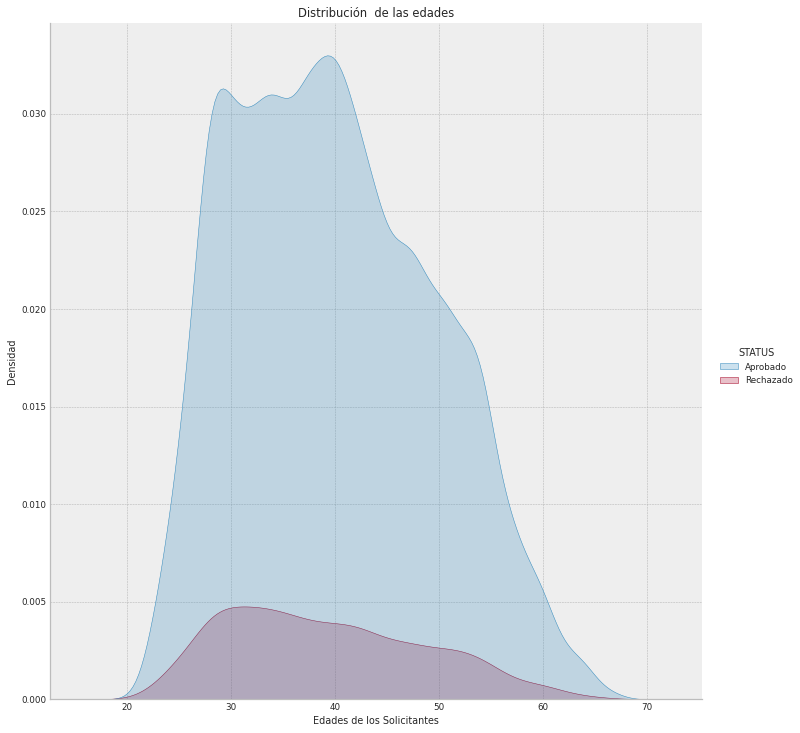

In [ ]:
# Distribución de edad
merge_record_change_value_status = merge_cleaned.copy()
merge_record_change_value_status["STATUS"] = np.where(merge_record_change_value_status["STATUS"] == 0, "Aprobado", "Rechazado")
ax = sns.displot(data=merge_record_change_value_status,x='AGE', kind='kde', hue='STATUS', fill=True, height=10)
ax.set(xlabel='Edades de los Solicitantes',
       ylabel='Densidad', title='Distribución  de las edades')

**Interpretación de los resultados**

La distribución de los aprobados es del tipo leptokurtica con inclinación negativa. En la misma se observa un pico entre la edades de 35 y 45 años. Por otro lado la distribución de los rechazados es del tipo mesokurtica. En conclusión la edad es un factor que indice en la aprobación de las TDC, siendo los mas jovenes quienes cuentan con mayor tasa de aprobación. 


###¿cuales edades y sexos presentan mayores ingresos?

In [ ]:
fig = px.histogram(merge_cleaned, x="AGE", y="AMT_INCOME_TOTAL", color="CODE_GENDER", marginal="box",
                   hover_data=merge_cleaned.columns)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Interpretación de los resultados**

En general el nivel de ingreso de las mujeres es mayor que los hombres y en ambos sexos dicho nivel disminuye a medida que avanza la edad. Lo cual se relaciona con el grafico anterior, donde los mas jovenes cuentan con una mayor tasa de aprobacion. 

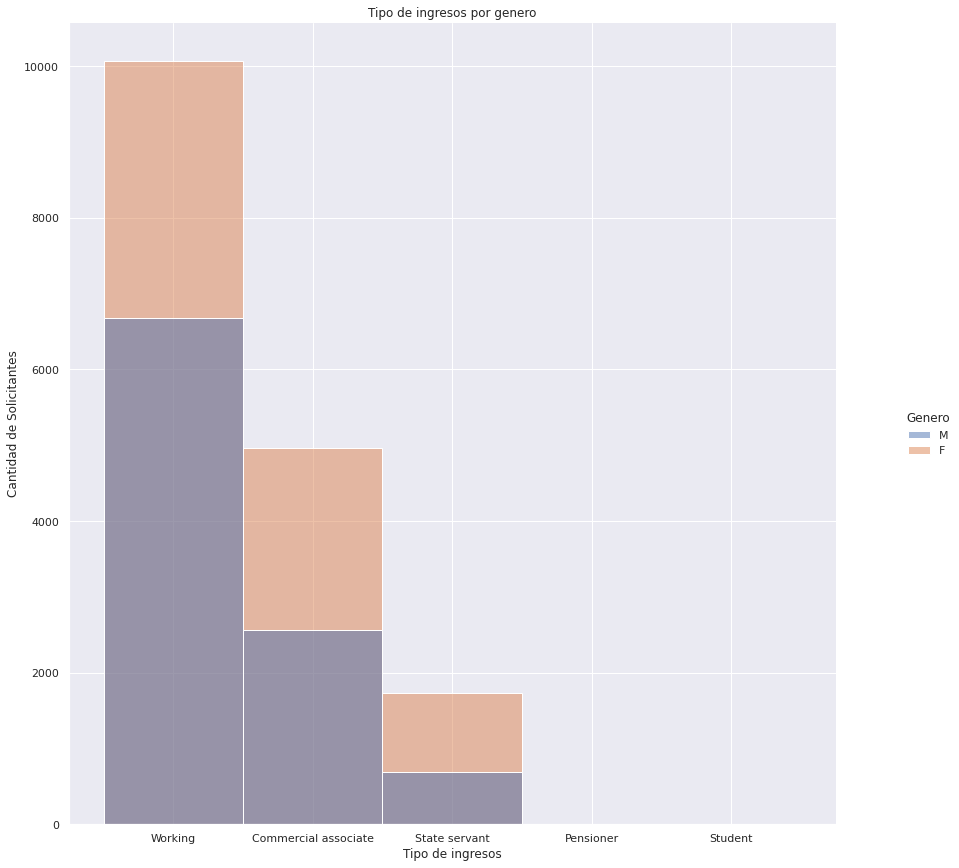

In [ ]:
#  Grafico de ingresos
sns.set(font_scale=1)
ax = sns.displot(data=merge_cleaned, x="NAME_INCOME_TYPE",
                 hue="CODE_GENDER", height=12)
ax.set(xlabel='Tipo de ingresos', ylabel='Cantidad de Solicitantes',
       title="Tipo de ingresos por genero")
ax.legend.set_title("Genero")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



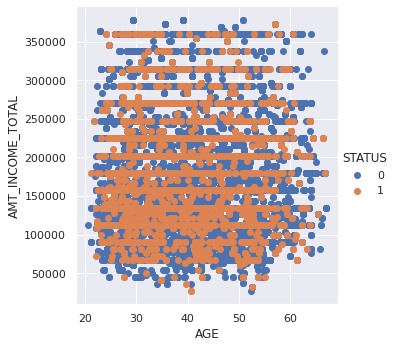

In [ ]:
sns.FacetGrid(merge_cleaned,hue = 'STATUS' , size = 5).map(plt.scatter,'AGE','AMT_INCOME_TOTAL').add_legend();
plt.show()

## Analisis Multivariado


### 1 - ¿Cuál es el nivel de correlación entre las variales?


Se procede a borrar datos con lo que no se trabajará


In [ ]:
corr_merge_record=merge_cleaned.copy()
corr_merge_record.drop(["ID"], axis=1, inplace=True)
corr_merge_record.head()


STATUS CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
2       0           M            Y               Y             0   
3       0           F            N               Y             0   
4       0           F            N               Y             0   
5       0           F            N               Y             0   
6       0           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   
5          270000.0  Commercial associate  Secondary / secondary special   
6          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE        AGE  YEARS_EMPLOYED  \
2               Married  House / apartment  58.832877        3.106849   
3  Single / not married  House / apartment  52.356164        8.358904   
4  Single / not married  House / apartment  52.356164        8.358904   
5  Single / not married  House / apartment  52.356164        8.358904   
6  Single / not married  House / apartment  52.356164        8.358904   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   
5           1                0           1           1     Sales staff   
6           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
2              2.0  
3              1.0  
4              1.0  
5              1.0  
6              1.0

### Normalizando


Se comenzarrá a verificar la correlación que existe entre las variables, para esto será necesario normalizar la información respecto a un valor número, con la idea que los valores categoricos, puedan ser numéricos.


In [ ]:
def changeNameEducation(e):
    if e == "Higher education":
        return 0
    elif e == "Secondary / secondary special":
        return 1
    elif e == 'Incomplete higher':
        return 2
    elif e == 'Lower secondary':
        return 3
    elif e == 'Academic degree':
        return 4
    else:
        return 5


def changeNameIncomeType(e):
    if e == "Working":
        return 0
    elif e == "Commercial associate":
        return 1
    elif e == 'Pensioner':
        return 2
    elif e == 'State servant':
        return 3
    else:
        return 4


def changFamilyStatus(e):
    if e == "Civil marriage":
        return 0
    elif e == "Married":
        return 1
    elif e == 'Single / not married':
        return 2
    elif e == 'Separated':
        return 3
    elif e == 'Widow':
        return 4
    else:
        return 5


def changHousingType(e):
    if e == "Rented apartment":
        return 0
    elif e == "House / apartment":
        return 1
    elif e == 'Municipal apartment':
        return 2
    elif e == 'With parents':
        return 3
    elif e == 'Co-op apartment':
        return 4
    elif e == 'Office apartment':
        return 5
    else:
        return 6


def changOccupationType(e):
    if e == "Security staff":
        return 0
    elif e == "Sales staff":
        return 1
    elif e == 'Accountants':
        return 2
    elif e == 'Laborers':
        return 3
    elif e == 'Managers':
        return 4
    elif e == 'Drivers':
        return 5
    elif e == 'Core staff':
        return 6
    elif e == 'High skill tech staff':
        return 7
    elif e == 'Cleaning staff':
        return 8
    elif e == 'Private service staff':
        return 9
    elif e == 'Cooking staff':
        return 10
    elif e == 'Low-skill Laborers':
        return 11
    elif e == 'Medicine staff':
        return 12
    elif e == 'Low-skill Laborer':
        return 13
    elif e == 'Secretaries':
        return 14
    elif e == 'Waiters/barmen staff':
        return 15
    elif e == 'HR staff':
        return 16
    elif e == 'Realty agents':
        return 17
    elif e == 'IT staff':
        return 18
    else:
        return 19


def changeCodeGender(dataIn):
    if dataIn == "F":
        return 0
    elif dataIn == "M":
        return 1


def changeOwnCar(dataIn):
    if dataIn == "Y":
        return 0
    elif dataIn == "N":
        return 1


def changeOwnRealty(dataIn):
    if dataIn == "Y":
        return 0
    elif dataIn == "N":
        return 1


In [ ]:
corr_merge_record['NAME_EDUCATION_TYPE'] = corr_merge_record['NAME_EDUCATION_TYPE'].apply(
    lambda x: changeNameEducation(x))
corr_merge_record["NAME_EDUCATION_TYPE"].unique()


array([1, 0, 2, 3, 4])

In [ ]:
corr_merge_record['NAME_INCOME_TYPE'] = corr_merge_record['NAME_INCOME_TYPE'].apply(
    lambda x: changeNameIncomeType(x))
corr_merge_record["NAME_INCOME_TYPE"].unique()


array([0, 1, 3, 2, 4])

In [ ]:
corr_merge_record['NAME_FAMILY_STATUS'] = corr_merge_record['NAME_FAMILY_STATUS'].apply(
    lambda x: changFamilyStatus(x))
corr_merge_record["NAME_FAMILY_STATUS"].unique()


array([1, 2, 0, 3, 4])

In [ ]:
corr_merge_record['NAME_HOUSING_TYPE'] = corr_merge_record['NAME_HOUSING_TYPE'].apply(
    lambda x: changHousingType(x))
corr_merge_record["NAME_HOUSING_TYPE"].unique()


array([1, 0, 2, 3, 4, 5])

In [ ]:
corr_merge_record['OCCUPATION_TYPE'] = corr_merge_record['OCCUPATION_TYPE'].apply(
    lambda x: changOccupationType(x))
corr_merge_record["OCCUPATION_TYPE"].unique()


array([ 0,  1,  2,  3, 19,  5,  6,  4,  7,  8,  9, 10, 11, 12, 14, 15, 16,
       17, 18])

In [ ]:
corr_merge_record['CODE_GENDER'] = corr_merge_record['CODE_GENDER'].apply(
    lambda x: changeCodeGender(x))
corr_merge_record["CODE_GENDER"].unique()


array([1, 0])

In [ ]:
corr_merge_record['FLAG_OWN_CAR'] = corr_merge_record['FLAG_OWN_CAR'].apply(
    lambda x: changeOwnCar(x))
corr_merge_record["FLAG_OWN_CAR"].unique()


array([0, 1])

In [ ]:
corr_merge_record['FLAG_OWN_REALTY'] = corr_merge_record['FLAG_OWN_REALTY'].apply(
    lambda x: changeOwnRealty(x))
corr_merge_record["FLAG_OWN_REALTY"].unique()


array([0, 1])

In [ ]:
corr_merge_record.head()


STATUS  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
2       0            1             0                0             0   
3       0            0             1                0             0   
4       0            0             1                0             0   
5       0            0             1                0             0   
6       0            0             1                0             0   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
2          112500.0                 0                    1   
3          270000.0                 1                    1   
4          270000.0                 1                    1   
5          270000.0                 1                    1   
6          270000.0                 1                    1   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE        AGE  YEARS_EMPLOYED  \
2                   1                  1  58.832877        3.106849   
3                   2                  1  52.356164        8.358904   
4                   2                  1  52.356164        8.358904   
5                   2                  1  52.356164        8.358904   
6                   2                  1  52.356164        8.358904   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
2           1                0           0           0                0   
3           1                0           1           1                1   
4           1                0           1           1                1   
5           1                0           1           1                1   
6           1                0           1           1                1   

   CNT_FAM_MEMBERS  
2              2.0  
3              1.0  
4              1.0  
5              1.0  
6              1.0

In [ ]:
# corr_merge_record.corr()["STATUS"]


| Pearson’s r Value | Correlation Between x and y          |
| ----------------- | ------------------------------------ |
| equal to 1        | perfect positive linear relationship |
| greater than 0    | positive correlation                 |
| equal to 0        | no linear relationship               |
| less than 0       | negative correlation                 |
| equal to -1       | perfect negative linear relationship |


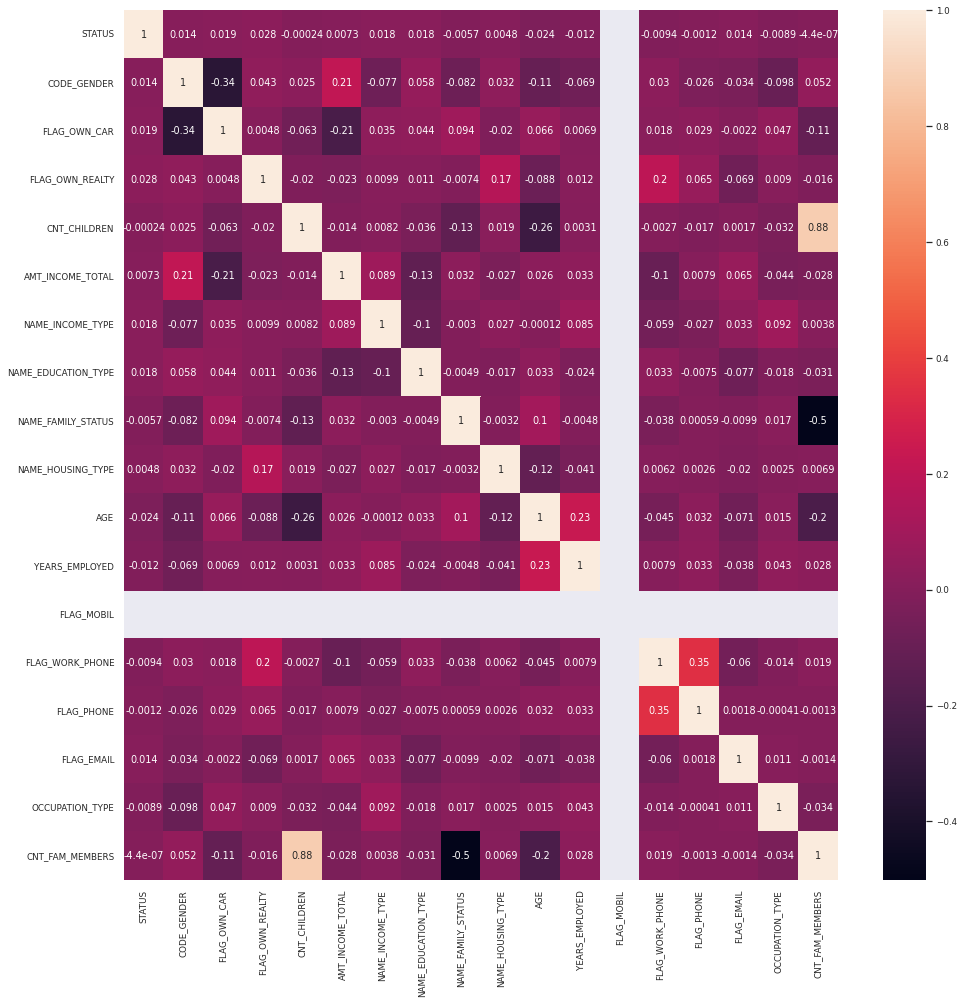

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.set(font_scale=0.8)
sns.heatmap(corr_merge_record.corr(), annot=True)


#### Variables con mayor correlación con la variable dependiente

- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- AMT_INCOME_TOTAL
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- FLAG_EMAIL


##### Conclusiones
1. Es posible apreciar que la mayor cantidad de personas que se les ha aprobado la tarjeta de crédito no poseen un vehículo personal. Junto a esto es posible verificar que el nivel educacional de las personas que se les aprobó la tarjeta fue: "Secondary / secondary special". Además que estaban casadas y poseían una casa o departamento propio.
2. Para el caso de la cantidad de hijos, la media ya la desviación estandar no nos estregan una correcta información, esto se debe a que logicamente no es posible tener un 0.5 hijos. Pero, si es posible comprobar que la mayor cantidad de personas que les otorgo una tarjeta de crédito no poseen hijos.
3. Para el caso de la desviación estandar relacionado al sueldo, se puede ver si que si existe una cercanía de los datos a esta, pero también existe una tendecia a alejarse de esta. Indicando que los datos, si tiene una tendencia a estar dispersos